In [1]:
import my_module as mm
device = mm.torch.device('cuda' if mm.torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
categories = [
    "anger",
    "surprise",
    "disgust",
    "fear",
    "neutral",
    "happiness",
    "sadness",
    "contempt"
]

X, y = mm.read_pic(mm.pd.read_csv('data/legend.csv'), categories)

In [3]:
convs = [8, 16, 24, 32]
fcs = [1024, 512, 64]

training_error = []
testing_error = []
train_sizes = [100, 1000, 3000, 5000, 7000, 10000, len(X)]
seed = 1234
count = 0

DIR_PATH = './model/'
mm.os.makedirs(DIR_PATH, exist_ok = True)

for m_tr in train_sizes:
    curX = X[:m_tr]
    cury = y[:m_tr]
    net = mm.Net2(1, 350, 350, 8, convs, fcs)
    if mm.torch.cuda.is_available():
        mm.torch.cuda.empty_cache()
        net.cuda()
    Xtr, Xva, ytr, yva = mm.train_test_split(curX, cury, test_size=0.1, random_state=seed, shuffle=True)
    trainloader, testloader = mm.get_loader(Xtr, Xva, ytr, yva, batch_size = 128)
    net = mm.train_process2(device, net, trainloader, LR = 1e-5, EPOCH = 10, PRINT = 5)
    training_error.append(1 - mm.accuracy(device, net, trainloader))
    testing_error.append(1 - mm.accuracy(device, net, testloader))
    PATH = DIR_PATH + "model_" + str(count) + ".pth"
    mm.torch.save(net.state_dict(), PATH)
    count += 1
    print("Done for model", count)

CrossEntropyLoss()
Finished Training
Done for model 1
CrossEntropyLoss()
[1,     5] loss: 2.050
[2,     5] loss: 1.898
[3,     5] loss: 1.780
[4,     5] loss: 1.727
[5,     5] loss: 1.748
[6,     5] loss: 1.726
[7,     5] loss: 1.741
[8,     5] loss: 1.726
[9,     5] loss: 1.735
[10,     5] loss: 1.722
Finished Training
Done for model 2
CrossEntropyLoss()
[1,     5] loss: 2.051
[1,    10] loss: 1.979
[1,    15] loss: 1.897
[1,    20] loss: 1.832
[2,     5] loss: 1.782
[2,    10] loss: 1.749
[2,    15] loss: 1.729
[2,    20] loss: 1.753
[3,     5] loss: 1.735
[3,    10] loss: 1.719
[3,    15] loss: 1.736
[3,    20] loss: 1.744
[4,     5] loss: 1.737
[4,    10] loss: 1.734
[4,    15] loss: 1.729
[4,    20] loss: 1.727
[5,     5] loss: 1.729
[5,    10] loss: 1.712
[5,    15] loss: 1.747
[5,    20] loss: 1.743
[6,     5] loss: 1.710
[6,    10] loss: 1.762
[6,    15] loss: 1.759
[6,    20] loss: 1.703
[7,     5] loss: 1.729
[7,    10] loss: 1.755
[7,    15] loss: 1.703
[7,    20] loss: 1.73

[0.2777777777777778, 0.4488888888888889, 0.4596296296296296, 0.3726666666666667, 0.423968253968254, 0.4708888888888889, 0.20623326028731437]
[0.4, 0.43999999999999995, 0.44999999999999996, 0.402, 0.3957142857142857, 0.45799999999999996, 0.23374726077428776]


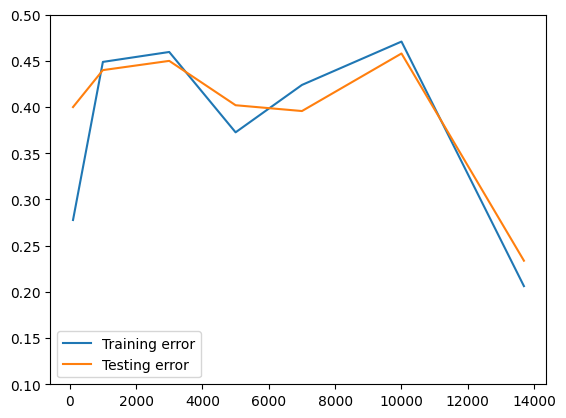

In [4]:
import matplotlib.pyplot as plt
from datetime import datetime
print(training_error)
print(testing_error)

plt.plot(train_sizes, training_error, label="Training error")
plt.plot(train_sizes, testing_error, label="Testing error")
plt.legend()
plt.ylim(0.1, 0.5)

FIG_PATH = './plot/'
mm.os.makedirs(FIG_PATH, exist_ok = True)
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"report_test_{current_time}.png"
plt.savefig(FIG_PATH + filename)

CUDA out of memory with higher fliter:
OutOfMemoryError: CUDA out of memory. Tried to allocate 3.65 GiB. GPU 0 has a total capacty of 15.73 GiB of which 200.50 MiB is free. Process 377677 has 2.16 GiB memory in use. Process 442884 has 13.36 GiB memory in use. Of the allocated memory 12.82 GiB is allocated by PyTorch, and 327.44 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

The conv(4) and fc(3) seems like getting the highest gap between training error and testing error. Let's see in beta test.